#Instruction -
# Upload the datset and the .h5 file  on google collab 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Before running the below cell paste the location of the csv file in the inverted comas below

In [3]:
Traffic_data = pd.read_csv('/content/webtraffic.csv',index_col='HourIndex')

In [66]:
Traffic_data

,Sessions
HourIndex,
0,1418159421
1,1113769116
2,919158921
3,822352824
4,735526737
...,...
4891,2555880561
4892,2454084459
4893,2405182410


Data visualisation

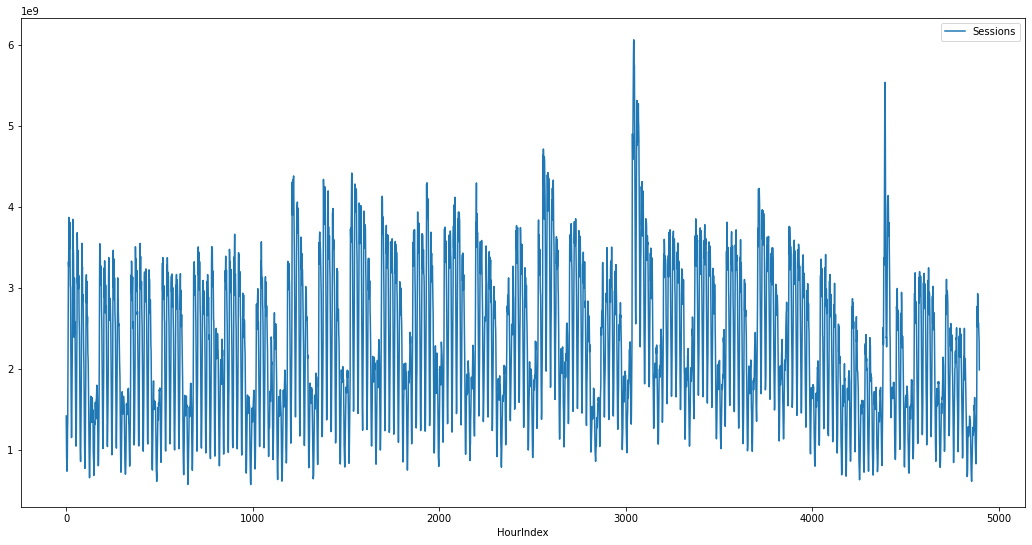

In [5]:
Traffic_data.plot(figsize=(18,9))

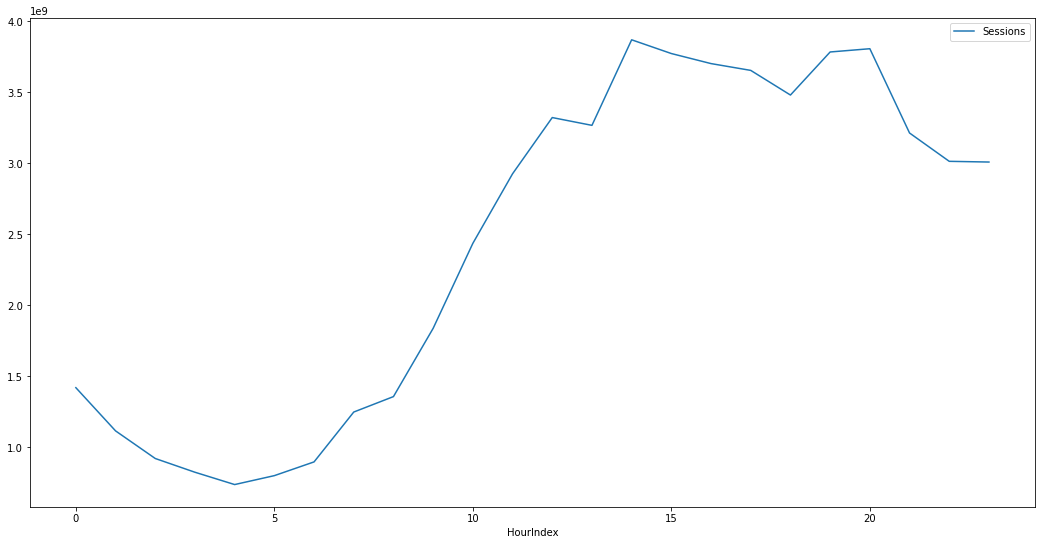

In [6]:
Traffic_data[:24].plot(figsize=(18,9))

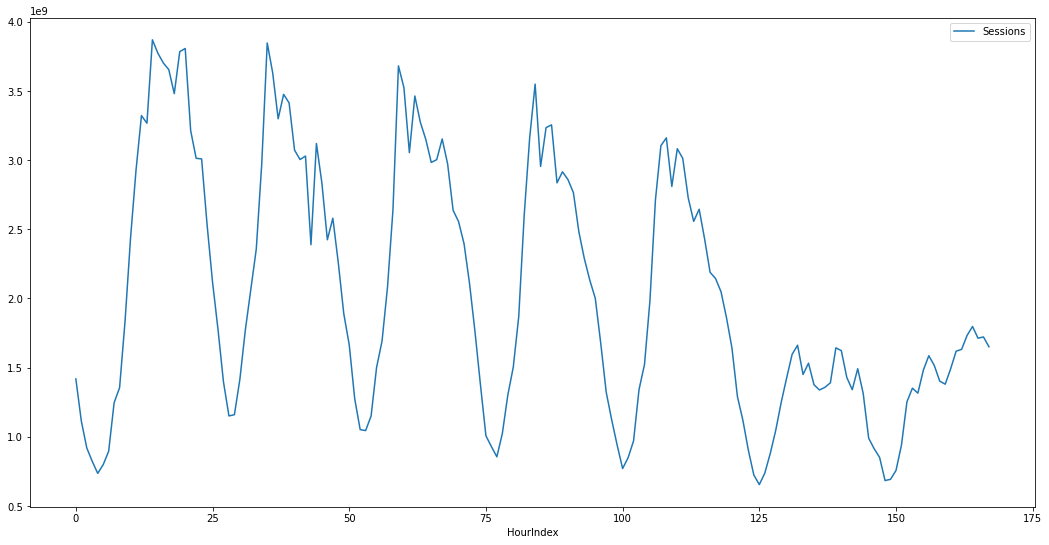

In [7]:
Traffic_data[:168].plot(figsize=(18,9))

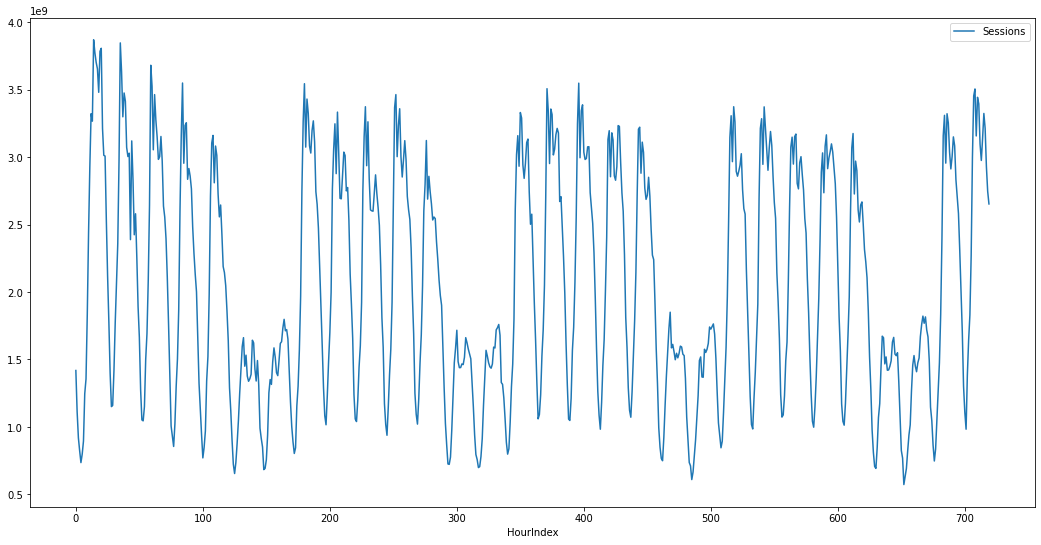

In [8]:
Traffic_data[:720].plot(figsize=(18,9))

Data preprocessing


In [9]:
Train_set = Traffic_data.iloc[:4872]
Test_set = Traffic_data.iloc[4872:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit(Train_set)
scaled_train = scaler.transform(Train_set)
scaled_test = scaler.transform(Test_set)

In [12]:
scaled_train[:5]

array([[0.15430752],
       [0.09887314],
       [0.06343148],
       [0.04580153],
       [0.02998909]])

In [13]:
scaled_test[:5]

array([[0.15249   ],
       [0.1001454 ],
       [0.08251545],
       [0.07124682],
       [0.05288986]])

Modifying Dataset

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
n_input = 168
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=24)

In [16]:
x,y = generator[0]
print(f'Given the Array: \n{x}')
print(f'Predict this y: \n {y}')

Given the Array: 
[[[0.15430752]
  [0.09887314]
  [0.06343148]
  ...
  [0.20792439]
  [0.20956016]
  [0.19665576]]

 [[0.09887314]
  [0.06343148]
  [0.04580153]
  ...
  [0.20956016]
  [0.19665576]
  [0.15594329]]

 [[0.06343148]
  [0.04580153]
  [0.02998909]
  ...
  [0.19665576]
  [0.15594329]
  [0.11195929]]

 ...

 [[0.48109778]
  [0.44474736]
  [0.4438386 ]
  ...
  [0.4783715 ]
  [0.4912759 ]
  [0.46274082]]

 [[0.44474736]
  [0.4438386 ]
  [0.35732461]
  ...
  [0.4912759 ]
  [0.46274082]
  [0.3956743 ]]

 [[0.4438386 ]
  [0.35732461]
  [0.28171574]
  ...
  [0.46274082]
  [0.3956743 ]
  [0.3785896 ]]]
Predict this y: 
 [[0.15594329]
 [0.11195929]
 [0.07869866]
 [0.05779716]
 [0.04234824]
 [0.04998182]
 [0.10632497]
 [0.13322428]
 [0.18193384]
 [0.25445293]
 [0.39712832]
 [0.49018539]
 [0.54143948]
 [0.45583424]
 [0.52071974]
 [0.50145402]
 [0.45747001]
 [0.44783715]
 [0.4783715 ]
 [0.4912759 ]
 [0.46274082]
 [0.3956743 ]
 [0.3785896 ]
 [0.34660124]]


In [17]:
x,y = generator[1]
print(f'Given the Array: \n{x}')
print(f'Predict this y: \n {y}')

Given the Array: 
[[[0.35732461]
  [0.28171574]
  [0.21937477]
  ...
  [0.3956743 ]
  [0.3785896 ]
  [0.34660124]]

 [[0.28171574]
  [0.21937477]
  [0.15030898]
  ...
  [0.3785896 ]
  [0.34660124]
  [0.29462014]]

 [[0.21937477]
  [0.15030898]
  [0.10559796]
  ...
  [0.34660124]
  [0.29462014]
  [0.24663759]]

 ...

 [[0.41203199]
  [0.33751363]
  [0.36586696]
  ...
  [0.41875682]
  [0.44910941]
  [0.44456561]]

 [[0.33751363]
  [0.36586696]
  [0.30716103]
  ...
  [0.44910941]
  [0.44456561]
  [0.39676481]]

 [[0.36586696]
  [0.30716103]
  [0.24027626]
  ...
  [0.44456561]
  [0.39676481]
  [0.40130862]]]
Predict this y: 
 [[0.29462014]
 [0.24663759]
 [0.18756816]
 [0.13158851]
 [0.09342057]
 [0.08106143]
 [0.12068339]
 [0.16593966]
 [0.20537986]
 [0.25990549]
 [0.39930934]
 [0.4525627 ]
 [0.48727735]
 [0.42002908]
 [0.50308979]
 [0.44747365]
 [0.38676845]
 [0.38604144]
 [0.41875682]
 [0.44910941]
 [0.44456561]
 [0.39676481]
 [0.40130862]
 [0.35732461]]


Building ad training neural network 

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras

In [19]:
model =  Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True, input_shape=(n_input,n_features)))
model.add(LSTM(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse')




# Warning Warning 
#Do not run the next cell 
#Running the next cell will reset the parameters and start the training again which will change the output 


In [68]:
model.fit(generator,epochs=20)

Epoch 1/30
196/196 [==============================] - 50s 243ms/step - loss: 0.0215
Epoch 2/30
196/196 [==============================] - 47s 242ms/step - loss: 0.0056
Epoch 3/30
196/196 [==============================] - 50s 253ms/step - loss: 0.0024
Epoch 4/30
196/196 [==============================] - 52s 265ms/step - loss: 0.0018
Epoch 5/30
196/196 [==============================] - 50s 257ms/step - loss: 0.0015
Epoch 6/30
196/196 [==============================] - 50s 253ms/step - loss: 0.0012
Epoch 7/30
196/196 [==============================] - 49s 248ms/step - loss: 0.0011
Epoch 8/30
196/196 [==============================] - 49s 248ms/step - loss: 0.0013
Epoch 9/30
196/196 [==============================] - 55s 280ms/step - loss: 0.0010
Epoch 10/30
196/196 [==============================] - 49s 250ms/step - loss: 0.0010
Epoch 11/30
196/196 [==============================] - 47s 240ms/step - loss: 8.9688e-04
Epoch 12/30
196/196 [==============================] - 48s 243ms/step 

#Run the cells below this after loading the weights 
# To load the weights jump to  the from tensorflow.keras.models import load_model and  model.load_weights("/content/Data Networks.h5")

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 168, 128)          66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 122,241
Trainable params: 122,241
Non-trainable params: 0
_________________________________________________________________


In [23]:
x.shape

(24, 168, 1)

Predicting values

In [24]:
last_train_batch = scaled_train[-168:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [25]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 547ms/step


array([[0.13840666]], dtype=float32)

In [26]:
scaled_test[0]

array([0.15249])

In [27]:
true_predictions = scaler.inverse_transform(scaled_test)

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(Test_set)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
test_predictions

1/1 [==============================] - 0s 37ms/step


[array([0.13840666], dtype=float32),
 array([0.11270578], dtype=float32),
 array([0.08917706], dtype=float32),
 array([0.06811833], dtype=float32),
 array([0.059031], dtype=float32),
 array([0.06552218], dtype=float32),
 array([0.08599266], dtype=float32),
 array([0.11910637], dtype=float32),
 array([0.15987799], dtype=float32),
 array([0.20686844], dtype=float32),
 array([0.26653787], dtype=float32),
 array([0.3117639], dtype=float32),
 array([0.31489664], dtype=float32),
 array([0.30602968], dtype=float32),
 array([0.32841665], dtype=float32),
 array([0.329032], dtype=float32),
 array([0.3293182], dtype=float32),
 array([0.34361026], dtype=float32),
 array([0.35786855], dtype=float32),
 array([0.36279348], dtype=float32),
 array([0.35467356], dtype=float32),
 array([0.33540475], dtype=float32),
 array([0.3063698], dtype=float32),
 array([0.26658997], dtype=float32)]

In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
Test_set['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Output

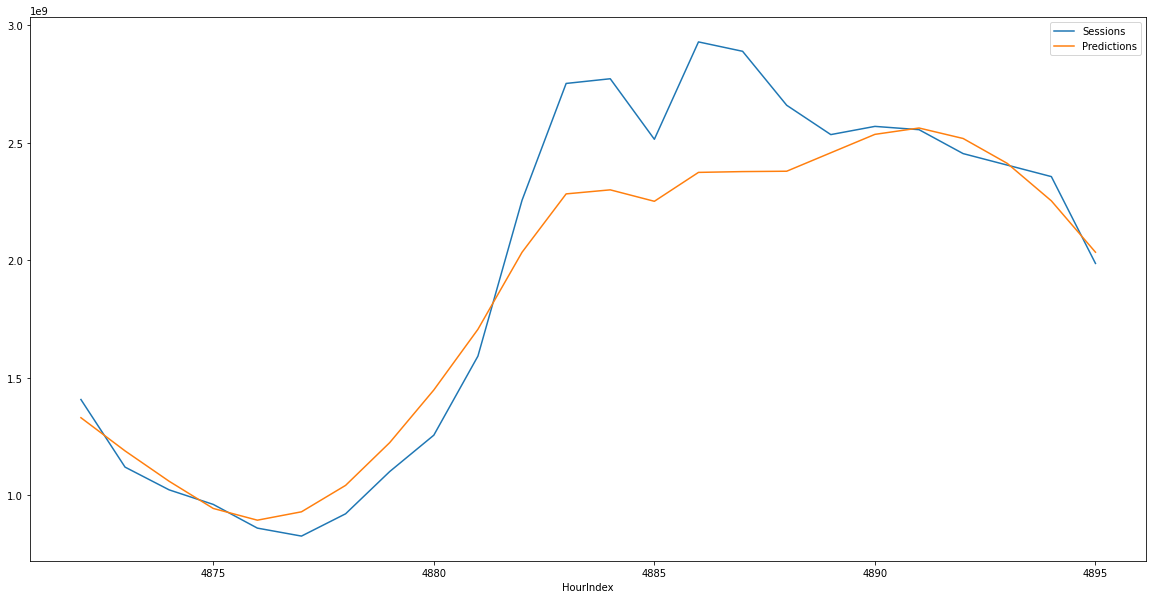

In [31]:
Test_set.plot(figsize=(20,10))

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(Test_set['Sessions'],Test_set['Predictions']))
print(rmse)

236194323.13639098



Accuracy 

In [100]:
from sklearn.metrics import r2_score
score = r2_score(Test_set["Sessions"], Test_set["Predictions"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


#Loading weights 
# Run the next cell

In [22]:
from tensorflow.keras.models import load_model

#Before running the next cell paste the path of the .h5 file in the inverted comas
# After running the next cell go back to model summary above and start running cells from there 

In [21]:
model.load_weights("/content/Data Networks.h5")

# calculating confidence interval for 90%

In [61]:
# we have taken a sample size of 60 

In [53]:
Traffic_Data_Sample =Traffic_data.sample(60)

In [54]:
Traffic_Data_Sample

,Sessions
HourIndex,
1266,3227535234
2993,1751491755
3249,2672646678
4079,2441110446
229,2936118942
4865,1235525238
525,2758474764
646,1527939531
4335,1556881560


In [62]:
#calculating mean(a) and std(b)

In [55]:
a=Traffic_Data_Sample.mean()

In [56]:
a

Sessions    1.992858e+09
dtype: float64

In [57]:
b=Traffic_Data_Sample.std()

In [58]:
b

Sessions    9.052274e+08
dtype: float64

Calculating confidence interval for 90 %. For 90 percent the Z-score is 1.645.


In [64]:
#Lower limit  = a-(1.645*b)

In [59]:
a-(1.645*b)

Sessions    5.037592e+08
dtype: float64

In [63]:
#Upper limit = a+(1.645*b)

In [60]:
a+(1.645*b)

Sessions    3.481957e+09
dtype: float64

Confidence interval with 90% confidence level is [5.037592e+08 - 3.481957e+09]

In [65]:
# the conidence interval for 90 percent confidence level is [5.037592e+08 - 3.481957e+09]